In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ml_help
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from time import time
sns.set_theme()

# Load data

In [2]:
df = pd.read_csv("./data/yonge_flow_weather_incidents.csv.zip")
df

,currentSpeed,magnitudeOfDelay,length,delay,distance_from_point,visibility,temperature,FeelsLike,humidity,windSpeed,...,month_10,month_11,month_12,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,10.0,2.0,372.91800,199.0,0.001789,10.0,18.69,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,10.0,0.0,302.76535,0.0,0.112289,10.0,18.69,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,10.0,0.0,302.76535,0.0,0.112289,10.0,18.69,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,10.0,0.0,273.82825,0.0,0.127365,10.0,18.69,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,10.0,0.0,254.24487,0.0,0.112289,10.0,18.69,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94051,10.0,0.0,0.00000,0.0,-1.000000,10.0,9.77,6.07,41.0,9.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
94052,13.0,0.0,0.00000,0.0,-1.000000,10.0,9.77,6.07,41.0,9.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
94053,18.0,0.0,0.00000,0.0,-1.000000,10.0,9.64,5.90,40.0,9.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
94054,13.0,0.0,0.00000,0.0,-1.000000,10.0,9.61,5.86,40.0,9.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
X = df.drop("currentSpeed",axis=1)
y = df["currentSpeed"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [4]:
metrics = pd.read_csv("./metrics/144_best_metrics.csv.zip")
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit,time_to_predict
0,XGBoost,0.630352,1.672786,5.137128,2.266523,2.761727e+13,8.893545,0.087886
1,Random Forest,0.476019,2.065215,7.281951,2.698509,5.015841e+13,44.036437,0.172392
2,MLP,0.472533,2.004118,7.330388,2.707469,3.240796e+13,126.927541,0.037395
3,Decision Tree,0.445061,2.101347,7.712179,2.777081,4.738855e+13,0.360994,0.007335


# Load models

## XGBoost

### Run CV

In [5]:
import xgboost as xgb

params = ml_help.params_to_dict("143_xgboost")

In [6]:
xgboost_pipeline = make_pipeline(StandardScaler(),xgb.XGBRegressor(**params))

xgb_cv_metrics = ml_help.run_stratified_kfold("XGBoost",xgboost_pipeline,X_train,y_train)
xgb_cv_metrics

Running fold 0...
Fold 0 took 9.579185962677002 seconds to fit!
Running fold 1...
Fold 1 took 9.562161445617676 seconds to fit!
Running fold 2...
Fold 2 took 9.597010612487793 seconds to fit!
Running fold 3...
Fold 3 took 9.349697351455688 seconds to fit!
Running fold 4...
Fold 4 took 9.28563642501831 seconds to fit!
Running fold 5...
Fold 5 took 9.213406324386597 seconds to fit!
Running fold 6...
Fold 6 took 9.277620792388916 seconds to fit!
Running fold 7...
Fold 7 took 9.337677478790283 seconds to fit!
Running fold 8...
Fold 8 took 9.280568838119507 seconds to fit!
Running fold 9...
Fold 9 took 9.23210883140564 seconds to fit!


{'model': 'XGBoost',
 'r2': 0.6396479646108629,
 'mae': 1.639352848218103,
 'mape': 24387166911125.746,
 'mse': 4.957587797352877,
 'rmse': 2.2265030608832204,
 'time_to_fit': 9.371507406234741}

### Test using previously unseen data

In [7]:
xgboost_pipeline = make_pipeline(StandardScaler(),xgb.XGBRegressor(**params))

start = time()
pipe = xgboost_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

xgb_metrics = ml_help.get_metrics_reg("XGBoost",y_test,y_pred)
xgb_metrics["time_to_fit"] = end-start
xgb_metrics

{'model': 'XGBoost',
 'r2': 0.6445735103128529,
 'mae': 1.6359322471249085,
 'mse': 4.886544796708063,
 'rmse': 2.2105530522265378,
 'mape': 27283937238916.453,
 'time_to_fit': 9.610621452331543}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


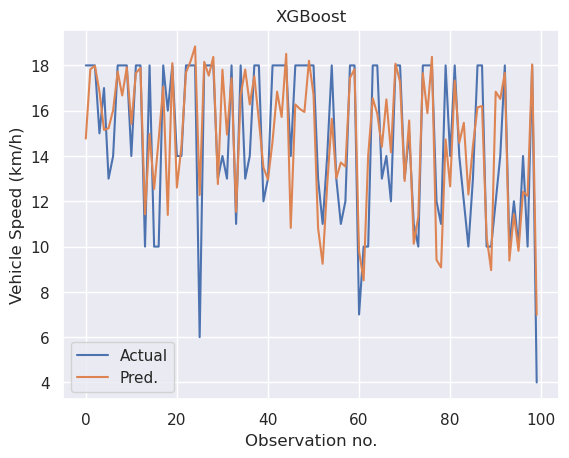

In [8]:
ml_help.plot_prediction(y_test, y_pred, "XGBoost", "Vehicle Speed (km/h)", "145_xgboost_predictions")

## Random Forest

### Run CV

In [9]:
from sklearn.ensemble import RandomForestRegressor

params = ml_help.params_to_dict("143_random_forest")

In [10]:
random_forest_pipeline = make_pipeline(StandardScaler(),RandomForestRegressor(**params,n_jobs=-1))

random_forest_cv_metrics = ml_help.run_stratified_kfold("Random Forest",random_forest_pipeline,X_train,y_train)
random_forest_cv_metrics

Running fold 0...
Fold 0 took 8.014103889465332 seconds to fit!
Running fold 1...
Fold 1 took 8.037940740585327 seconds to fit!
Running fold 2...
Fold 2 took 8.022054433822632 seconds to fit!
Running fold 3...
Fold 3 took 8.035262107849121 seconds to fit!
Running fold 4...
Fold 4 took 8.090583086013794 seconds to fit!
Running fold 5...
Fold 5 took 8.0671706199646 seconds to fit!
Running fold 6...
Fold 6 took 8.041125297546387 seconds to fit!
Running fold 7...
Fold 7 took 8.062970638275146 seconds to fit!
Running fold 8...
Fold 8 took 8.028110980987549 seconds to fit!
Running fold 9...
Fold 9 took 8.069920539855957 seconds to fit!


{'model': 'Random Forest',
 'r2': 0.4757697003006004,
 'mae': 2.0553980151044646,
 'mape': 51100035971534.22,
 'mse': 7.212148837569474,
 'rmse': 2.6854830319955902,
 'time_to_fit': 8.046924233436584}

### Test using previously unseen data

In [11]:
random_forest_pipeline = make_pipeline(StandardScaler(),RandomForestRegressor(**params))

start = time()
pipe = random_forest_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

random_forest_metrics = ml_help.get_metrics_reg("Random Forest",y_test,y_pred)
random_forest_metrics["time_to_fit"] = end-start
random_forest_metrics

{'model': 'Random Forest',
 'r2': 0.4666474939321428,
 'mae': 2.074914495697062,
 'mse': 7.332742462811826,
 'rmse': 2.7079037026474606,
 'mape': 69201488625920.805,
 'time_to_fit': 59.79597306251526}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


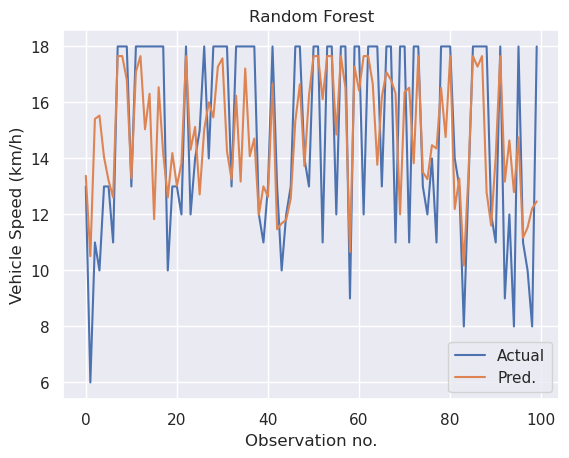

In [12]:
ml_help.plot_prediction(y_test, y_pred, "Random Forest", "Vehicle Speed (km/h)", "145_random_forest_predictions")

## Decision Tree

### Run CV

In [13]:
from sklearn.tree import DecisionTreeRegressor

params = ml_help.params_to_dict("143_decision_tree")

In [14]:
decision_tree_pipeline = make_pipeline(StandardScaler(),DecisionTreeRegressor(**params))

dtr_cv_metrics = ml_help.run_stratified_kfold("Decision Tree",decision_tree_pipeline,X_train,y_train)
dtr_cv_metrics

Running fold 0...
Fold 0 took 0.4300813674926758 seconds to fit!
Running fold 1...
Fold 1 took 0.43431520462036133 seconds to fit!
Running fold 2...
Fold 2 took 0.4307870864868164 seconds to fit!
Running fold 3...
Fold 3 took 0.44774341583251953 seconds to fit!
Running fold 4...
Fold 4 took 0.4436368942260742 seconds to fit!
Running fold 5...
Fold 5 took 0.4417564868927002 seconds to fit!
Running fold 6...
Fold 6 took 0.4336402416229248 seconds to fit!
Running fold 7...
Fold 7 took 0.4307703971862793 seconds to fit!
Running fold 8...
Fold 8 took 0.4353790283203125 seconds to fit!
Running fold 9...
Fold 9 took 0.43282222747802734 seconds to fit!


{'model': 'Decision Tree',
 'r2': 0.44507790589088037,
 'mae': 2.0910347047276767,
 'mape': 51393827401392.125,
 'mse': 7.634375427444111,
 'rmse': 2.762966107911708,
 'time_to_fit': 0.43609323501586916}

### Test using previously unseen data

In [15]:
decision_tree_pipeline = make_pipeline(StandardScaler(),DecisionTreeRegressor(**params))

start = time()
pipe = decision_tree_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

dtr_metrics = ml_help.get_metrics_reg("Decision Tree",y_test,y_pred)
dtr_metrics["time_to_fit"] = end-start
dtr_metrics

{'model': 'Decision Tree',
 'r2': 0.43625313149407374,
 'mae': 2.1076307797661467,
 'mse': 7.750616250867799,
 'rmse': 2.7839928611380813,
 'mape': 74468737195210.4,
 'time_to_fit': 0.4810166358947754}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


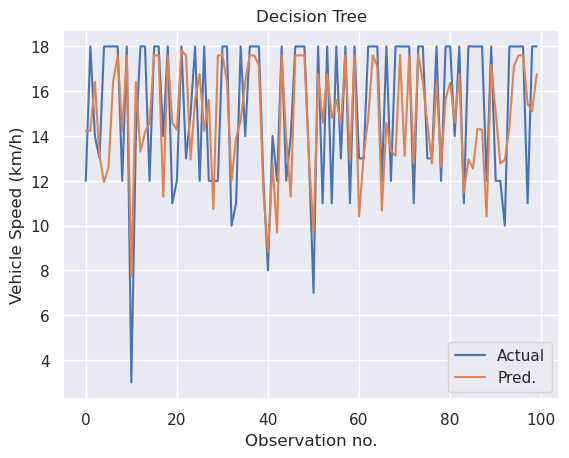

In [16]:
ml_help.plot_prediction(y_test, y_pred, "Decision Tree", "Vehicle Speed (km/h)", "145_decision_tree_predictions")

## MLP

### Run CV

In [17]:
from sklearn.neural_network import MLPRegressor

params = ml_help.params_to_dict("143_mlpr")

In [18]:
mlp_pipeline = make_pipeline(StandardScaler(),MLPRegressor(**params))

mlp_cv_metrics = ml_help.run_stratified_kfold("MLP",mlp_pipeline,X_train,y_train)
mlp_cv_metrics

Running fold 0...
Fold 0 took 145.71078205108643 seconds to fit!
Running fold 1...
Fold 1 took 158.65535187721252 seconds to fit!
Running fold 2...
Fold 2 took 123.45027422904968 seconds to fit!
Running fold 3...
Fold 3 took 178.09575486183167 seconds to fit!
Running fold 4...
Fold 4 took 165.05924725532532 seconds to fit!
Running fold 5...
Fold 5 took 109.03860473632812 seconds to fit!
Running fold 6...
Fold 6 took 169.95081853866577 seconds to fit!
Running fold 7...
Fold 7 took 122.42842936515808 seconds to fit!
Running fold 8...
Fold 8 took 132.9182698726654 seconds to fit!
Running fold 9...
Fold 9 took 134.06673622131348 seconds to fit!


{'model': 'MLP',
 'r2': 0.5061660337026009,
 'mae': 1.933058136678947,
 'mape': 29552965036882.52,
 'mse': 6.7940482519402225,
 'rmse': 2.6063410633330792,
 'time_to_fit': 143.93742690086364}

### Test using previously unseen data

In [19]:
mlp_pipeline = make_pipeline(StandardScaler(),MLPRegressor(**params))

start = time()
pipe = mlp_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

mlp_metrics = ml_help.get_metrics_reg("MLP",y_test,y_pred)
mlp_metrics["time_to_fit"] = end-start
mlp_metrics

{'model': 'MLP',
 'r2': 0.5134956769871609,
 'mae': 1.9154364020139258,
 'mse': 6.688655002295785,
 'rmse': 2.58624341512855,
 'mape': 33956848292640.035,
 'time_to_fit': 162.4887728691101}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


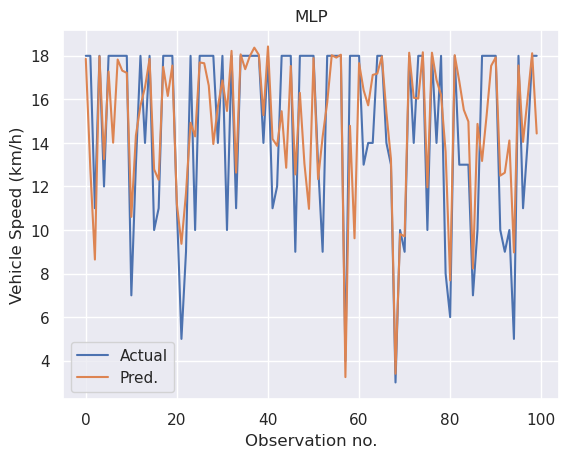

In [20]:
ml_help.plot_prediction(y_test, y_pred, "MLP", "Vehicle Speed (km/h)", "145_mlp_predictions")

# Store metrics

In [21]:
metrics_cv = pd.concat([pd.DataFrame(xgb_cv_metrics,index=[0]),pd.DataFrame(random_forest_cv_metrics,index=[0]),pd.DataFrame(dtr_cv_metrics,index=[0]),pd.DataFrame(mlp_cv_metrics,index=[0])])
metrics_cv.to_csv("./metrics/145_yonge_flow_incidents_cv_metrics.csv.zip",index=False,compression="zip")

metrics = pd.concat([pd.DataFrame(xgb_metrics,index=[0]),pd.DataFrame(random_forest_metrics,index=[0]),pd.DataFrame(dtr_metrics,index=[0]),pd.DataFrame(mlp_metrics,index=[0])])
metrics.to_csv("./metrics/145_yonge_flow_incidents_metrics.csv.zip",index=False,compression="zip")

# Print CV metrics

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


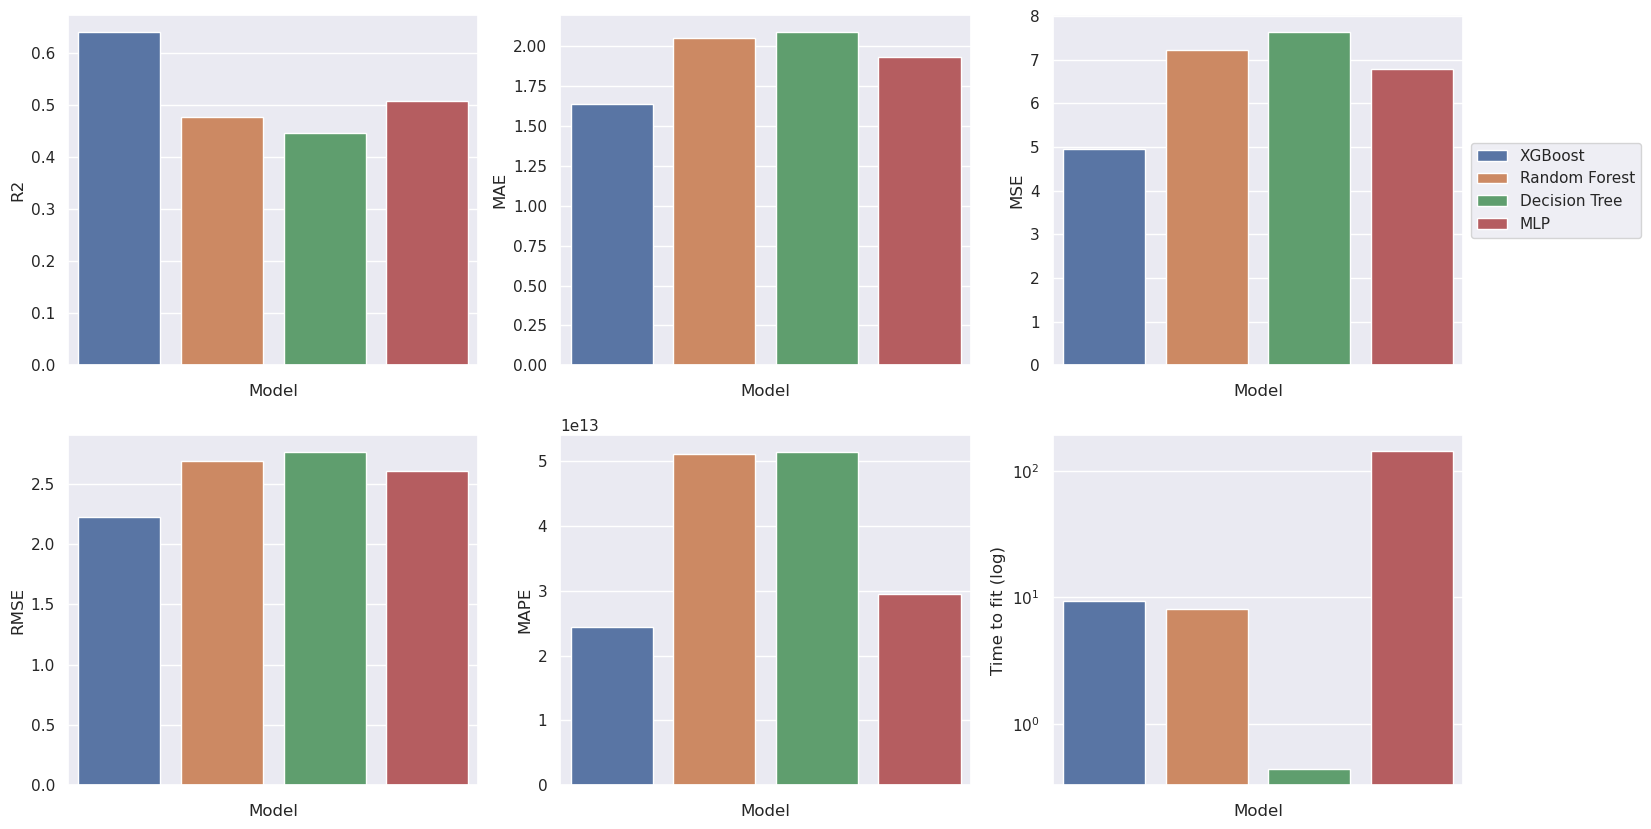

In [22]:
sns.set_theme()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.barplot(ax=axes[0, 0], data=metrics_cv, x='model', y='r2',hue="model",dodge=False)
sns.barplot(ax=axes[0, 1], data=metrics_cv, x='model', y='mae',hue="model",dodge=False)
sns.barplot(ax=axes[0, 2], data=metrics_cv, x='model', y='mse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 0], data=metrics_cv, x='model', y='rmse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 1], data=metrics_cv, x='model', y='mape',hue="model",dodge=False)
sns.barplot(ax=axes[1, 2], data=metrics_cv, x='model', y='time_to_fit',hue="model",dodge=False)

axes[0, 0].set(xlabel="Model",xticklabels=[])
axes[0, 0].set(ylabel="R2")
axes[0, 0].get_legend().remove()

axes[0, 1].set(xlabel="Model",xticklabels=[])
axes[0, 1].set(ylabel="MAE")
axes[0, 1].get_legend().remove()

axes[0, 2].set(xlabel="Model",xticklabels=[])
axes[0, 2].set(ylabel="MSE")
axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].set(xlabel="Model",xticklabels=[])
axes[1, 0].set(ylabel="RMSE")
axes[1, 0].get_legend().remove()

axes[1, 1].set(xlabel="Model",xticklabels=[])
axes[1, 1].set(ylabel="MAPE")
axes[1, 1].get_legend().remove()

axes[1, 2].set(xlabel="Model",xticklabels=[])
axes[1, 2].set(ylabel="Time to fit (log)", yscale="log")
axes[1, 2].get_legend().remove()

plt.savefig("./plots/145_yonge_flow_weather_incidents_cv_metrics.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/145_yonge_flow_weather_incidents_cv_metrics.png",bbox_inches="tight")

# Print metrics

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


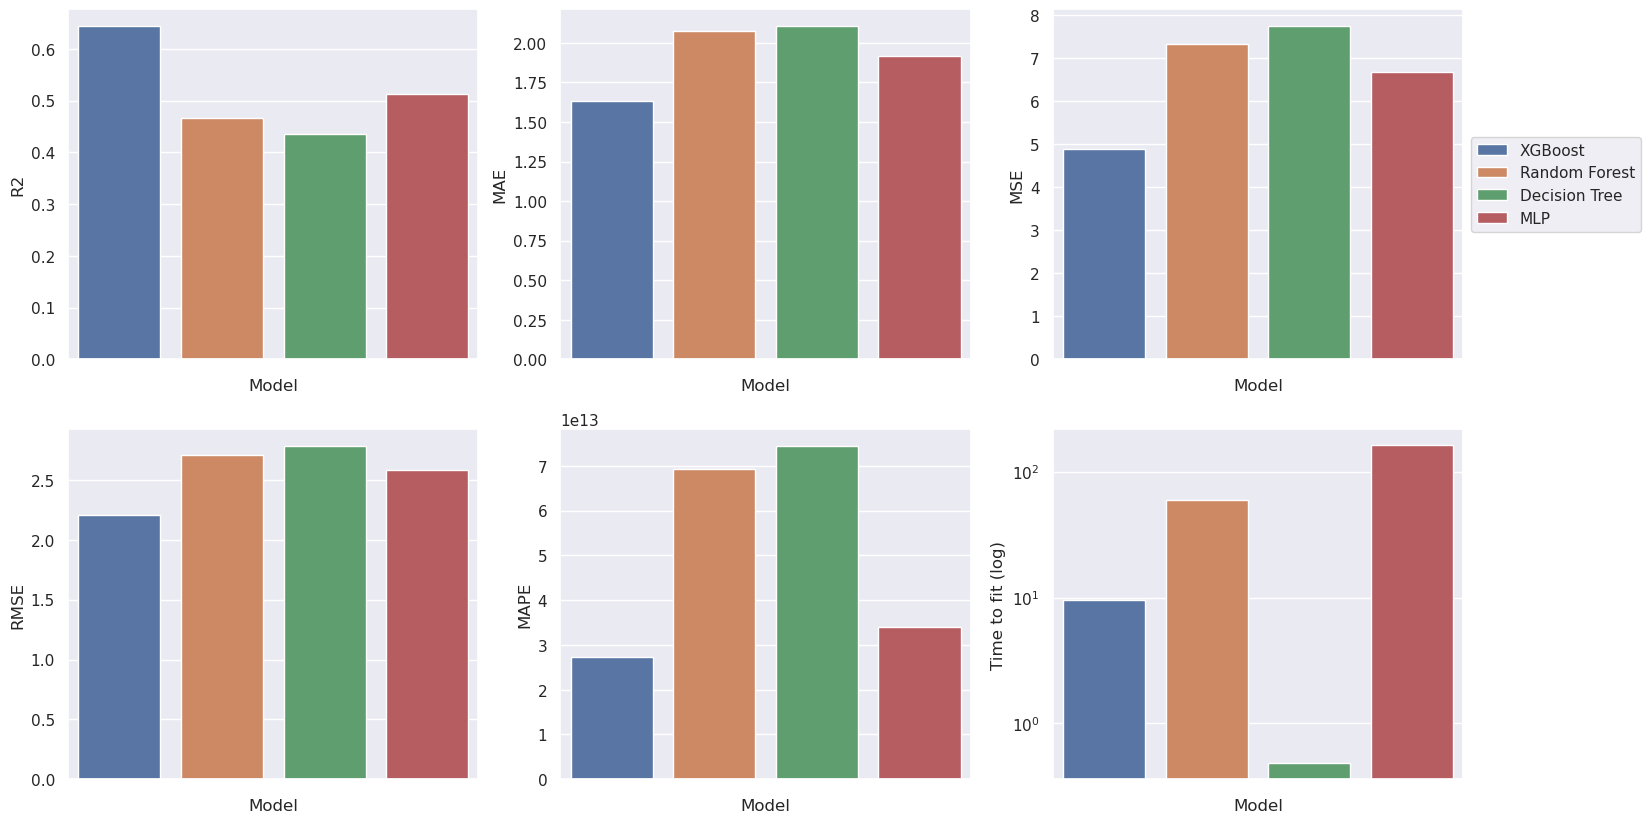

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.barplot(ax=axes[0, 0], data=metrics, x='model', y='r2',hue="model",dodge=False)
sns.barplot(ax=axes[0, 1], data=metrics, x='model', y='mae',hue="model",dodge=False)
sns.barplot(ax=axes[0, 2], data=metrics, x='model', y='mse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 0], data=metrics, x='model', y='rmse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 1], data=metrics, x='model', y='mape',hue="model",dodge=False)
sns.barplot(ax=axes[1, 2], data=metrics, x='model', y='time_to_fit',hue="model",dodge=False)

axes[0, 0].set(xlabel="Model",xticklabels=[])
axes[0, 0].set(ylabel="R2")
axes[0, 0].get_legend().remove()

axes[0, 1].set(xlabel="Model",xticklabels=[])
axes[0, 1].set(ylabel="MAE")
axes[0, 1].get_legend().remove()

axes[0, 2].set(xlabel="Model",xticklabels=[])
axes[0, 2].set(ylabel="MSE")
axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].set(xlabel="Model",xticklabels=[])
axes[1, 0].set(ylabel="RMSE")
axes[1, 0].get_legend().remove()

axes[1, 1].set(xlabel="Model",xticklabels=[])
axes[1, 1].set(ylabel="MAPE")
axes[1, 1].get_legend().remove()

axes[1, 2].set(xlabel="Model",xticklabels=[])
axes[1, 2].set(ylabel="Time to fit (log)", yscale="log")
axes[1, 2].get_legend().remove()

plt.savefig("./plots/145_yonge_flow_weather_incidents_metrics.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/145_yonge_flow_weather_incidents_metrics.png",bbox_inches="tight")